#  SECTION D – Predictive Analysis
Step-by-Step Forecasting Notebook

## Step 1: Import Libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files



## Step 2: Load Datasets

In [39]:
import pandas as pd

gold = pd.read_excel('/content/Bitcoin_Price_and_Volume.xlsx')
oil = pd.read_excel('/content/Gold_UNComtrade_2019_2024.xlsx')
btc = pd.read_excel('/content/Bitcoin_Price_and_Volume.xlsx')
swift = pd.read_csv('/content/SWIFT_RMB_Tracker.csv')

gold.head(), oil.head(), btc.head(), swift.head()



(        Date         price Outlier_price        volume Outlier_volume  \
 0 2021-01-01  34638.515903        Normal  9.035506e+10        Outlier   
 1 2021-02-01  46098.624936        Normal  7.349318e+10        Outlier   
 2 2021-03-01  54645.238214        Normal  6.798965e+10        Outlier   
 3 2021-04-01  57165.308582        Normal  6.050435e+10         Normal   
 4 2021-05-01  46980.511448        Normal  8.444621e+10        Outlier   
 
    Duplicate_Check Duplicate_Flag   Month Quarter  
 0                1         Unique  Annual      FY  
 1                1         Unique  Annual      FY  
 2                1         Unique  Annual      FY  
 3                1         Unique  Annual      FY  
 4                1         Unique  Annual      FY  ,
   typeCode freqCode  refPeriodId  Year  refMonth  Year_Check  Country_code  \
 0        C        A     20190101  2019        52        2019            20   
 1        C        A     20190101  2019        52        2019            31  

## Step 3: Create 3-Month Moving Average Forecast Function

In [40]:

def moving_average_forecast(df, column):
    df['MA_3_Forecast'] = df[column].rolling(3).mean()
    return df


In [41]:
# Function to auto-detect numeric column and clean it
def clean_numeric(df):
    # Find the first numeric-looking column
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        if df[col].notna().sum() > 5:
            value_col = col
            break

    df = df.dropna(subset=[value_col])
    return df, value_col



## Step 4: Apply Forecasting

In [42]:
gold, gold_val = clean_numeric(gold)
oil, oil_val = clean_numeric(oil)
btc, btc_val = clean_numeric(btc)

gold['MA_3_Forecast'] = gold[gold_val].rolling(3).mean()
oil['MA_3_Forecast']  = oil[oil_val].rolling(3).mean()
btc['MA_3_Forecast']  = btc[btc_val].rolling(3).mean()

gold.tail(), oil.tail(), btc.tail()


(                   Date          price Outlier_price        volume  \
 55  1754006400000000000  115508.350699        Normal  2.303652e+10   
 56  1756684800000000000  113375.235833        Normal  7.970968e+09   
 57  1759276800000000000  114683.475878        Normal  1.405472e+10   
 58  1761955200000000000   97474.322897        Normal  1.505340e+10   
 59  1764547200000000000   89540.704873        Normal  1.143016e+10   
 
    Outlier_volume  Duplicate_Check Duplicate_Flag   Month Quarter  \
 55         Normal                1         Unique  Annual      FY   
 56         Normal                1         Unique  Annual      FY   
 57         Normal                1         Unique  Annual      FY   
 58         Normal                1         Unique  Annual      FY   
 59         Normal                1         Unique  Annual      FY   
 
     MA_3_Forecast  
 55   1.751357e+18  
 56   1.754006e+18  
 57   1.756656e+18  
 58   1.759306e+18  
 59   1.761926e+18  ,
      typeCode  freqCod

## Step 5: Plot Forecast Graphs

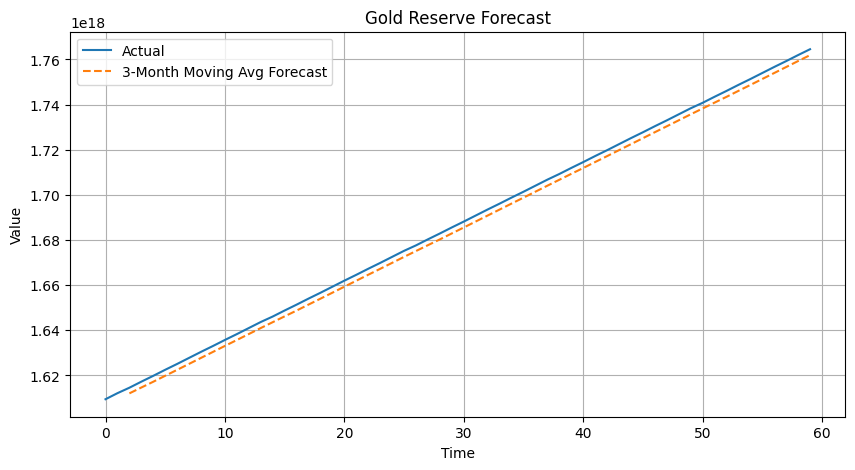

In [43]:

def plot_forecast(df, value_col, title):
    plt.figure(figsize=(10,5))
    plt.plot(df[value_col], label='Actual')
    plt.plot(df['MA_3_Forecast'], linestyle='--', label='3-Month Moving Avg Forecast')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_forecast(gold, gold_val, "Gold Reserve Forecast")


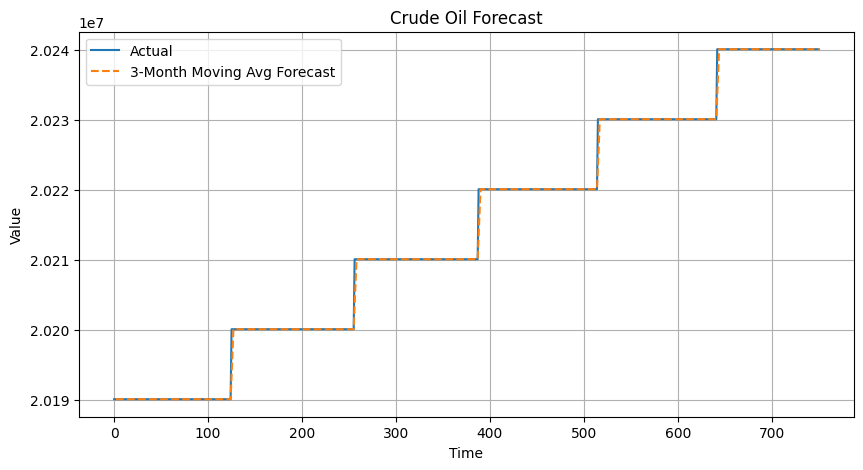

In [44]:
plot_forecast(oil, oil_val, "Crude Oil Forecast")



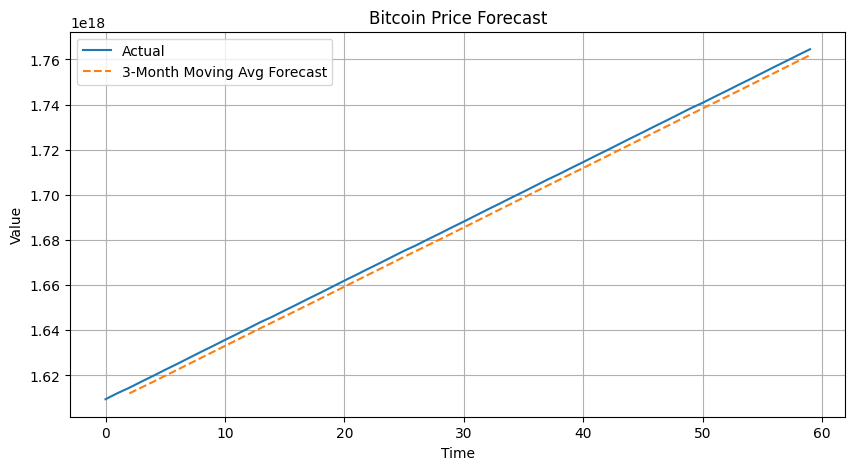

In [45]:
plot_forecast(btc, btc_val, "Bitcoin Price Forecast")



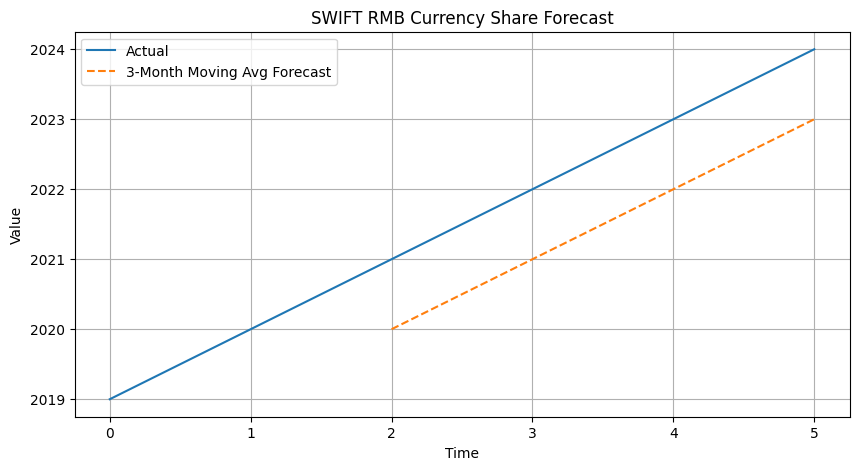

In [46]:
swift, swift_val = clean_numeric(swift)
swift['MA_3_Forecast'] = swift[swift_val].rolling(3).mean()

plot_forecast(swift, swift_val, "SWIFT RMB Currency Share Forecast")


In [47]:
import plotly.graph_objects as go
import numpy as np


In [48]:
def plot_interactive_3d_dots(df, value_col, title):
    df = df.reset_index(drop=True)
    x = np.arange(len(df))
    y = df[value_col].values
    z = df['MA_3_Forecast'].values

    fig = go.Figure()

    fig.add_trace(go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers',          # DOTS ONLY
        marker=dict(size=5),
        name="Forecast Dots"
    ))

    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title="Time",
            yaxis_title="Actual Value",
            zaxis_title="3-Month Forecast",
            bgcolor="black"
        ),
        paper_bgcolor="black",
        font=dict(color="white"),
        margin=dict(l=0, r=0, b=0, t=40)
    )

    fig.show()


In [49]:
plot_interactive_3d_dots(gold, gold_val, "Gold – Interactive 3D Forecast")


In [50]:
plot_interactive_3d_dots(oil, oil_val, "Crude Oil – Interactive 3D Forecast")


In [51]:
plot_interactive_3d_dots(btc, btc_val, "Bitcoin – Interactive 3D Forecast")

In [52]:
swift, swift_val = clean_numeric(swift)
swift['MA_3_Forecast'] = swift[swift_val].rolling(3).mean()
swift.tail()


,Year,RMB_Share_Percent,MA_3_Forecast
1,2020,1.91,NaN
2,2021,2.22,2020.0
3,2022,2.31,2021.0
4,2023,2.93,2022.0
5,2024,4.47,2023.0


In [53]:
plot_interactive_3d_dots(swift, swift_val, "BRICS Currency – Interactive 3D Forecast")